<a href="https://colab.research.google.com/github/Amar2497/CS-GO-Data-Analysis/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Columns in dataset: Index(['player_id', 'nickname', 'real_name', 'age', 'country', 'current_team',
       'teams', 'total_kills', 'total_deaths', 'headshot_percentage',
       'damage_per_round', 'grenade_dmg_per_round', 'maps_played',
       'rounds_played', 'kills_per_death', 'kills_per_round',
       'assists_per_round', 'deaths_per_round', 'saved_by_teammate_per_round',
       'saved_teammates_per_round', 'rounds_with_kills', 'kill_to_death_diff',
       'total_opening_kills', 'total_opening_deaths', 'opening_kill_ratio',
       'opening_kill_rating', 'team_win_percent_after_first_kill',
       'first_kill_in_won_rounds', '0_kill_rounds', '1_kill_rounds',
       '2_kill_rounds', '3_kill_rounds', '4_kill_rounds', '5_kill_rounds',
       'rifle_kills', 'sniper_kills', 'smg_kills', 'pistol_kills',
       'grenade_kills', 'other_kills', 'rating'],
      dtype='object')
Average Kills Per Round: 0.69
Average Deaths Per Round: 0.67


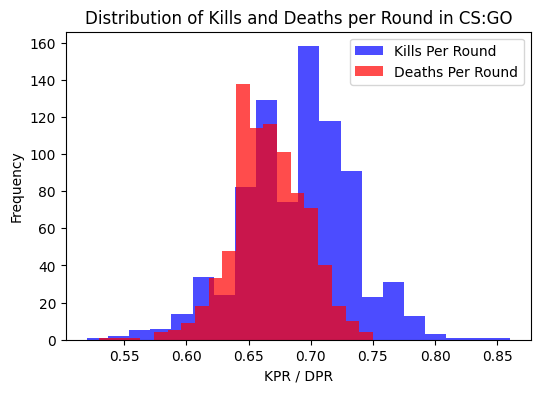

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the dataset
df = pd.read_csv("/content/csgo_players.csv", encoding="latin1")
# Display column names to verify
print("Columns in dataset:", df.columns)

# Rename columns if necessary
# Check if 'Kills Per Round' exists before renaming
df.rename(columns={'kills_per_round': 'KPR', 'deaths_per_round': 'DPR'}, inplace=True)

# Compute basic statistics
avg_kills = df["KPR"].mean()
avg_deaths = df["DPR"].mean()
print(f"Average Kills Per Round: {avg_kills:.2f}")
print(f"Average Deaths Per Round: {avg_deaths:.2f}")

# Ensure the "images" folder exists for saving charts
if not os.path.exists("images"):
    os.makedirs("images")

# Plot Player K/D Ratio Distribution
plt.figure(figsize=(6, 4))
plt.hist(df["KPR"], bins=20, color="blue", alpha=0.7, label="Kills Per Round")
plt.hist(df["DPR"], bins=20, color="red", alpha=0.7, label="Deaths Per Round")
plt.xlabel("KPR / DPR")
plt.ylabel("Frequency")
plt.title("Distribution of Kills and Deaths per Round in CS:GO")
plt.legend()
plt.savefig("images/performance_chart.png")
plt.show()

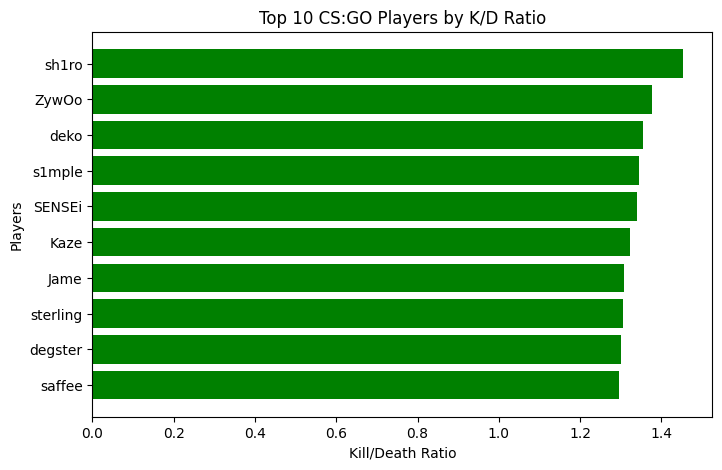

In [55]:
# Top 10 players by Kill-to-Death Ratio
df["K/D Ratio"] = df["KPR"] / df["DPR"]
top_players = df.sort_values(by="K/D Ratio", ascending=False).head(10)

# Plot
plt.figure(figsize=(8, 5))
# The column name is likely 'nickname' instead of 'Player'
plt.barh(top_players["nickname"], top_players["K/D Ratio"], color="green")
plt.xlabel("Kill/Death Ratio")
plt.ylabel("Players")
plt.title("Top 10 CS:GO Players by K/D Ratio")
plt.gca().invert_yaxis()  # Reverse order to show highest first
plt.savefig("images/top_kd_ratio.png")
plt.show()

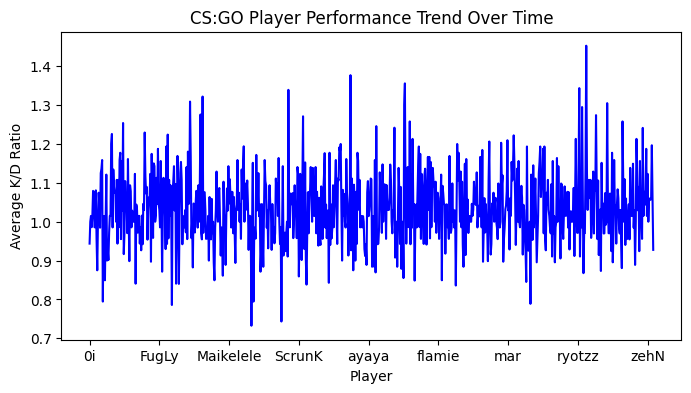

In [57]:
# Convert date column (if available)
# Check if 'Date' column exists before processing
if 'Date' in df.columns:
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Average K/D ratio over time
# If 'Date' column exists, group by 'Date', otherwise group by player's nickname
if 'Date' in df.columns:
    df.groupby("Date")["K/D Ratio"].mean().plot(figsize=(8, 4), color="blue")
else:
    # Group by player's nickname if 'Date' is not available
    df.groupby("nickname")["K/D Ratio"].mean().plot(figsize=(8, 4), color="blue")

plt.xlabel("Date" if 'Date' in df.columns else "Player")  # Update x-axis label
plt.ylabel("Average K/D Ratio")
plt.title("CS:GO Player Performance Trend Over Time")
plt.savefig("images/kd_trend.png")
plt.show()

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [65]:
X = df[["KPR", "DPR", "headshot_percentage"]]
y = df["K/D Ratio"]

In [66]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Convert 'headshot_percentage' to numerical values before model training
df['headshot_percentage'] = df['headshot_percentage'].astype(str).str.rstrip('%').astype('float') / 100

# Now proceed with your model training as before:
X = df[["KPR", "DPR", "headshot_percentage"]]
y = df["K/D Ratio"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [70]:
# Predict
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")



Mean Absolute Error: 0.0040


In [72]:
import os
import joblib

# Ensure the "models" directory exists before saving
if not os.path.exists("models"):
    os.makedirs("models")

# Now save the model
joblib.dump(model, "models/csgo_model.pkl")

['models/csgo_model.pkl']